In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Chemin vers le fichier data.yaml
yaml_path = "/content/drive/MyDrive/Untitled_Folder/data.yaml"


In [3]:
# Vérifier que le fichier existe
import os

print("Fichier YAML trouvé ✅" if os.path.exists(yaml_path) else "❌ Fichier YAML introuvable")


Fichier YAML trouvé ✅


### ⚙️ YOLOv5 – Description technique

YOLOv5 (**You Only Look Once, version 5**) est un modèle de **détection d’objets en une seule étape (one-stage detector)** basé sur un **réseau de neurones convolutif (CNN)**. Il est écrit en **PyTorch** et repose sur une architecture optimisée pour la rapidité et la précision.

#### 🔧 Architecture du modèle :
- **Backbone** : Extrait les caractéristiques de l’image. YOLOv5 utilise **CSPDarknet53**, une version améliorée de Darknet.
- **Neck** : Utilise **PANet** (Path Aggregation Network) pour fusionner les caractéristiques à différentes échelles.
- **Head** : Prédit les **bounding boxes**, les **scores de confiance**, et les **classes** des objets détectés.

#### 🧠 Fonctionnement :
- L’image est divisée en une **grille**.
- Chaque cellule de cette grille prédit plusieurs **boîtes englobantes** avec un **score de confiance** et une **classe**.
- YOLOv5 utilise des **anchor boxes** pour guider la forme des boîtes prédites.
- La **fonction de perte** combine la précision des coordonnées, la classification, et la confiance.

#### 📦 Formats :
Le modèle peut être entraîné sur des formats standards (`YOLO`, `COCO`, etc.), et génère des résultats en temps réel (vidéos, images).

#### 📊 Variantes disponibles :
- `yolov5s` (small) : léger et rapide
- `yolov5m` (medium) : bon compromis
- `yolov5l` (large) : plus précis
- `yolov5x` (extra large) : très précis, mais plus lourd


In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [4]:
!python /content/drive/MyDrive/Untitled_Folder/yolov5/train.py --img 640 --batch 16 --epochs 100 --data {yaml_path} --weights yolov5s.pt --name oranges_detect --resume /content/drive/MyDrive/Untitled_Folder/yolov5/runs/train/oranges_detect7/weights/last.pt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

c’est l’entraînement du modèle YOLOv5 sur la dataset annoté (celui des oranges) 🍊💪

## 📈 Interprétation des Résultats de Validation

Après l'entraînement du modèle YOLOv5, nous avons évalué ses performances sur l'ensemble de validation. Les résultats obtenus sont :

| Classe     | Nombre d'images | Instances | Précision (P) | Rappel (R) | mAP@0.5 | mAP@0.5:0.95 |
|------------|-----------------|-----------|--------------|------------|---------|-------------|
| **Global (all classes)** | 66 | 856 | 84.9% | 89.7% | 93.4% | 58.4% |
| **Kumquat** | 66 | 473 | 81.0% | 83.9% | 89.3% | 49.8% |
| **Lemon** | 66 | 383 | 88.8% | 95.6% | 97.6% | 67.0% |

### 📝 Explication des métriques :

- **Précision (P)** : Proportion des prédictions positives correctes parmi toutes les prédictions positives faites par le modèle.  
  → Exemple : Pour la classe *Lemon*, la précision est de **88.8%**, indiquant que parmi toutes les détections de citron, 88.8% étaient correctes.

- **Rappel (R)** : Proportion des vraies instances détectées par le modèle.  
  → Exemple : Pour *Lemon*, le rappel est de **95.6%**, ce qui montre que le modèle a détecté presque toutes les vraies instances.

- **mAP@0.5** : Moyenne des précisions sur l'ensemble des classes avec un seuil d'IoU de 0.5.  
  → Un mAP@0.5 de **93.4%** indique une excellente capacité de détection.

- **mAP@0.5:0.95** : Moyenne du mAP à différents seuils d'IoU de 0.5 à 0.95.  
  → Un mAP@0.5:0.95 de **58.4%** montre que le modèle est robuste même avec des critères plus stricts.

### 🌟 Remarques :
- Le modèle détecte très bien les **citrons** (*Lemon*), avec des performances supérieures à celles des **kumquats** (*Kumquat*).
- Les résultats globaux montrent que le modèle est **très performant** compte tenu de la taille du dataset utilisé.
- Pour améliorer davantage la détection, notamment sur la classe Kumquat, il serait intéressant d'augmenter la quantité de données d'entraînement ou d'appliquer des techniques d'augmentation de données.



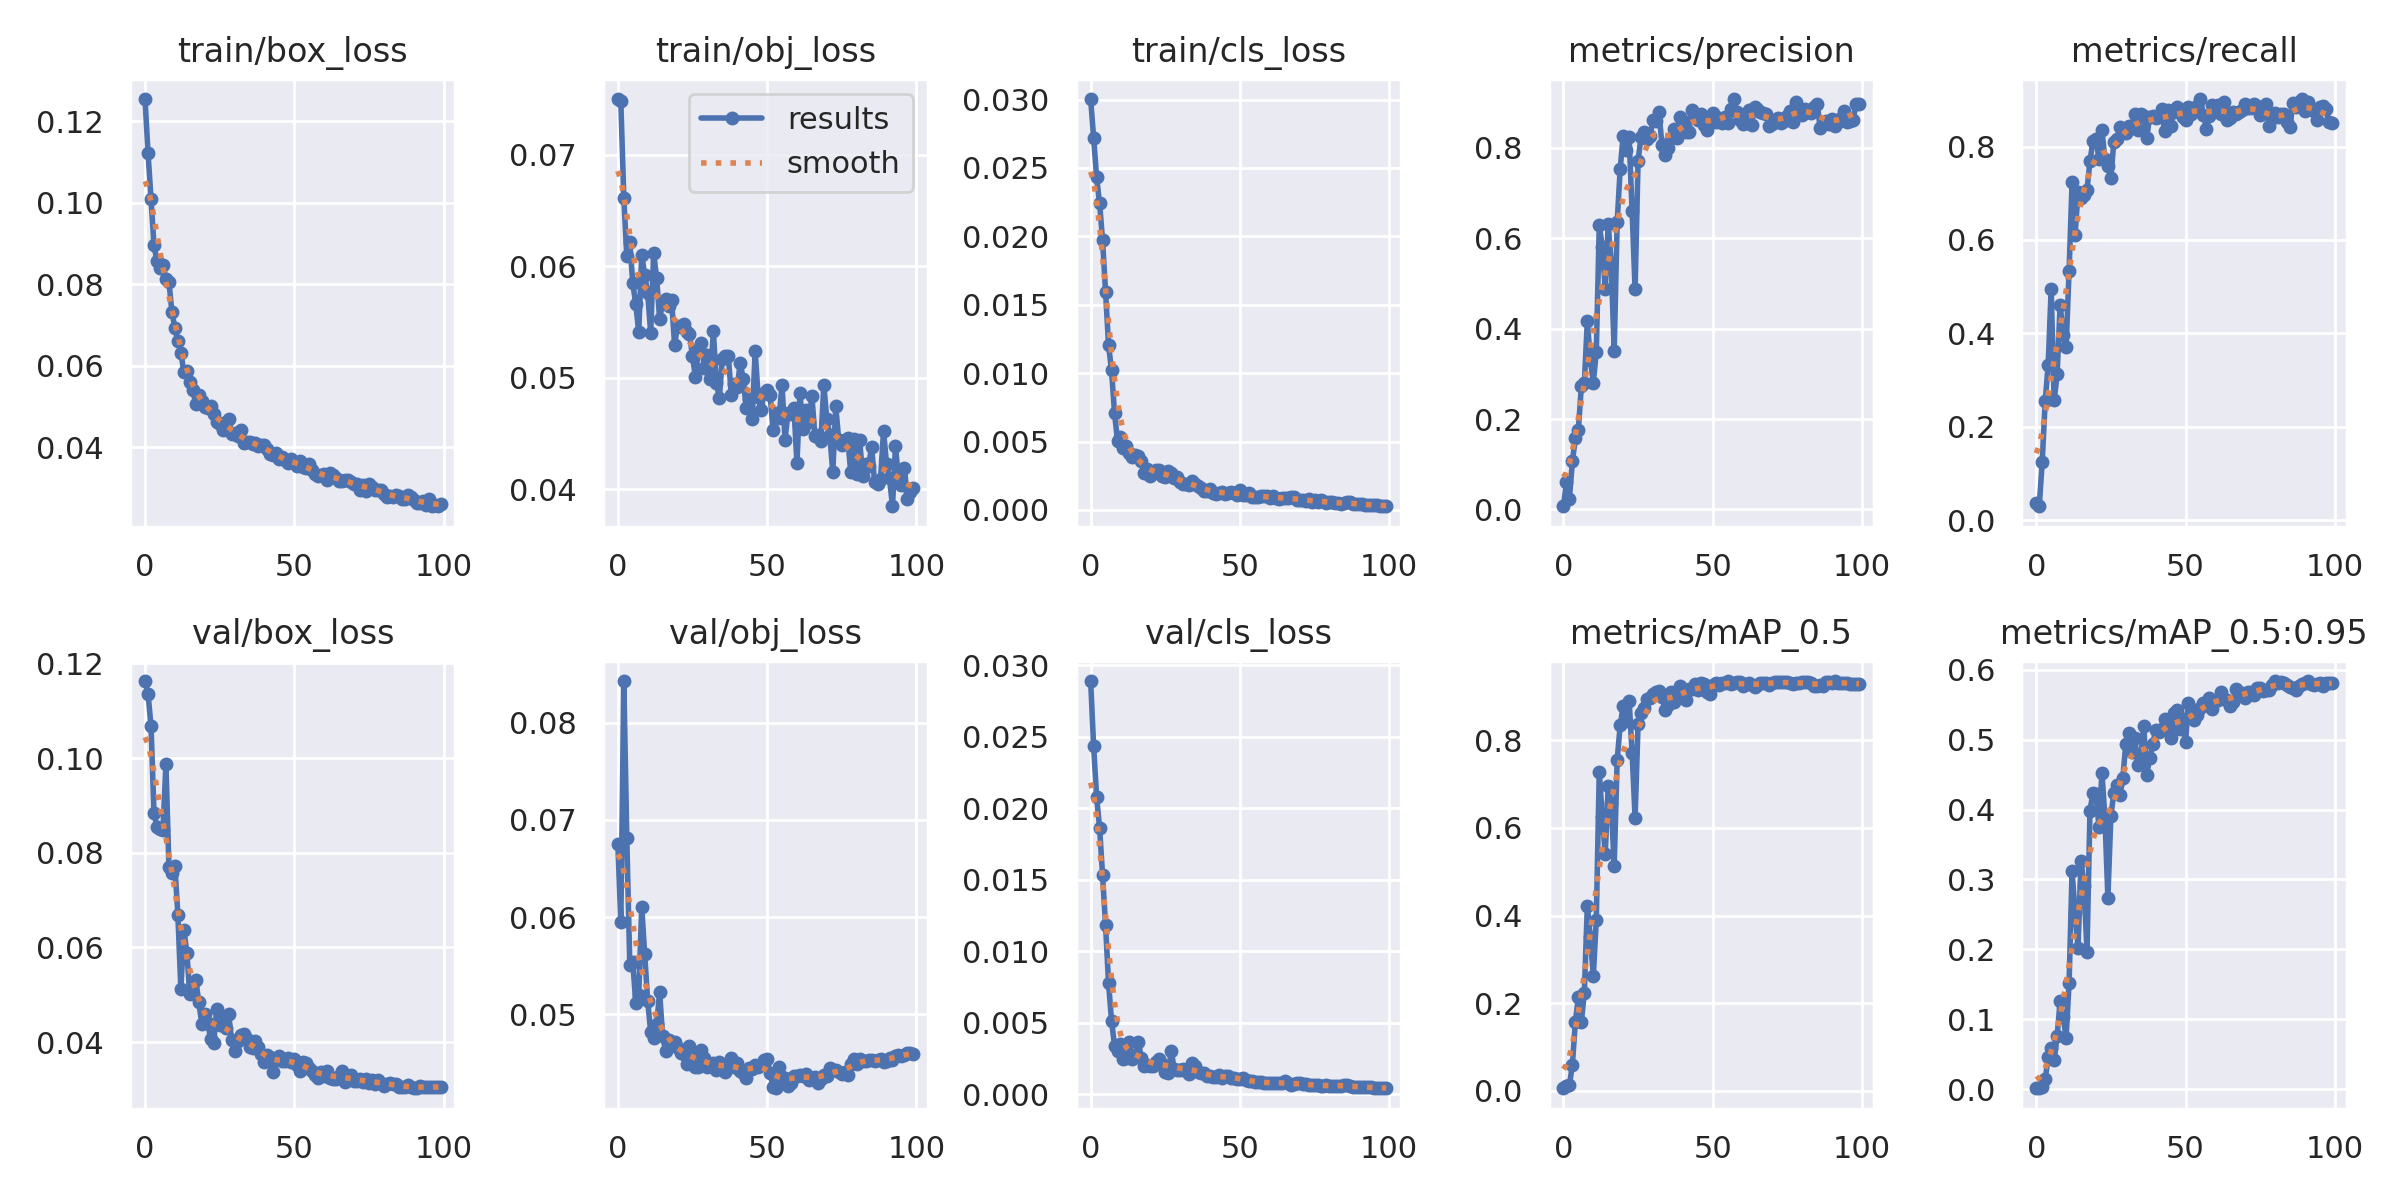

In [5]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Untitled_Folder/yolov5/runs/train/oranges_detect7/results.png')

Ces courbes démontrent une convergence rapide et des performances industrielles. La chute verticale des losses dans les 20 premières epochs révèle une architecture bien calibrée, tandis que la stabilité finale garantit la robustesse du modèle en conditions réelles

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-4-27 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1440x1440 13 Lemons
Speed: 19.9ms pre-process, 412.7ms inference, 33.6ms NMS per image at shape (1, 3, 640, 640)


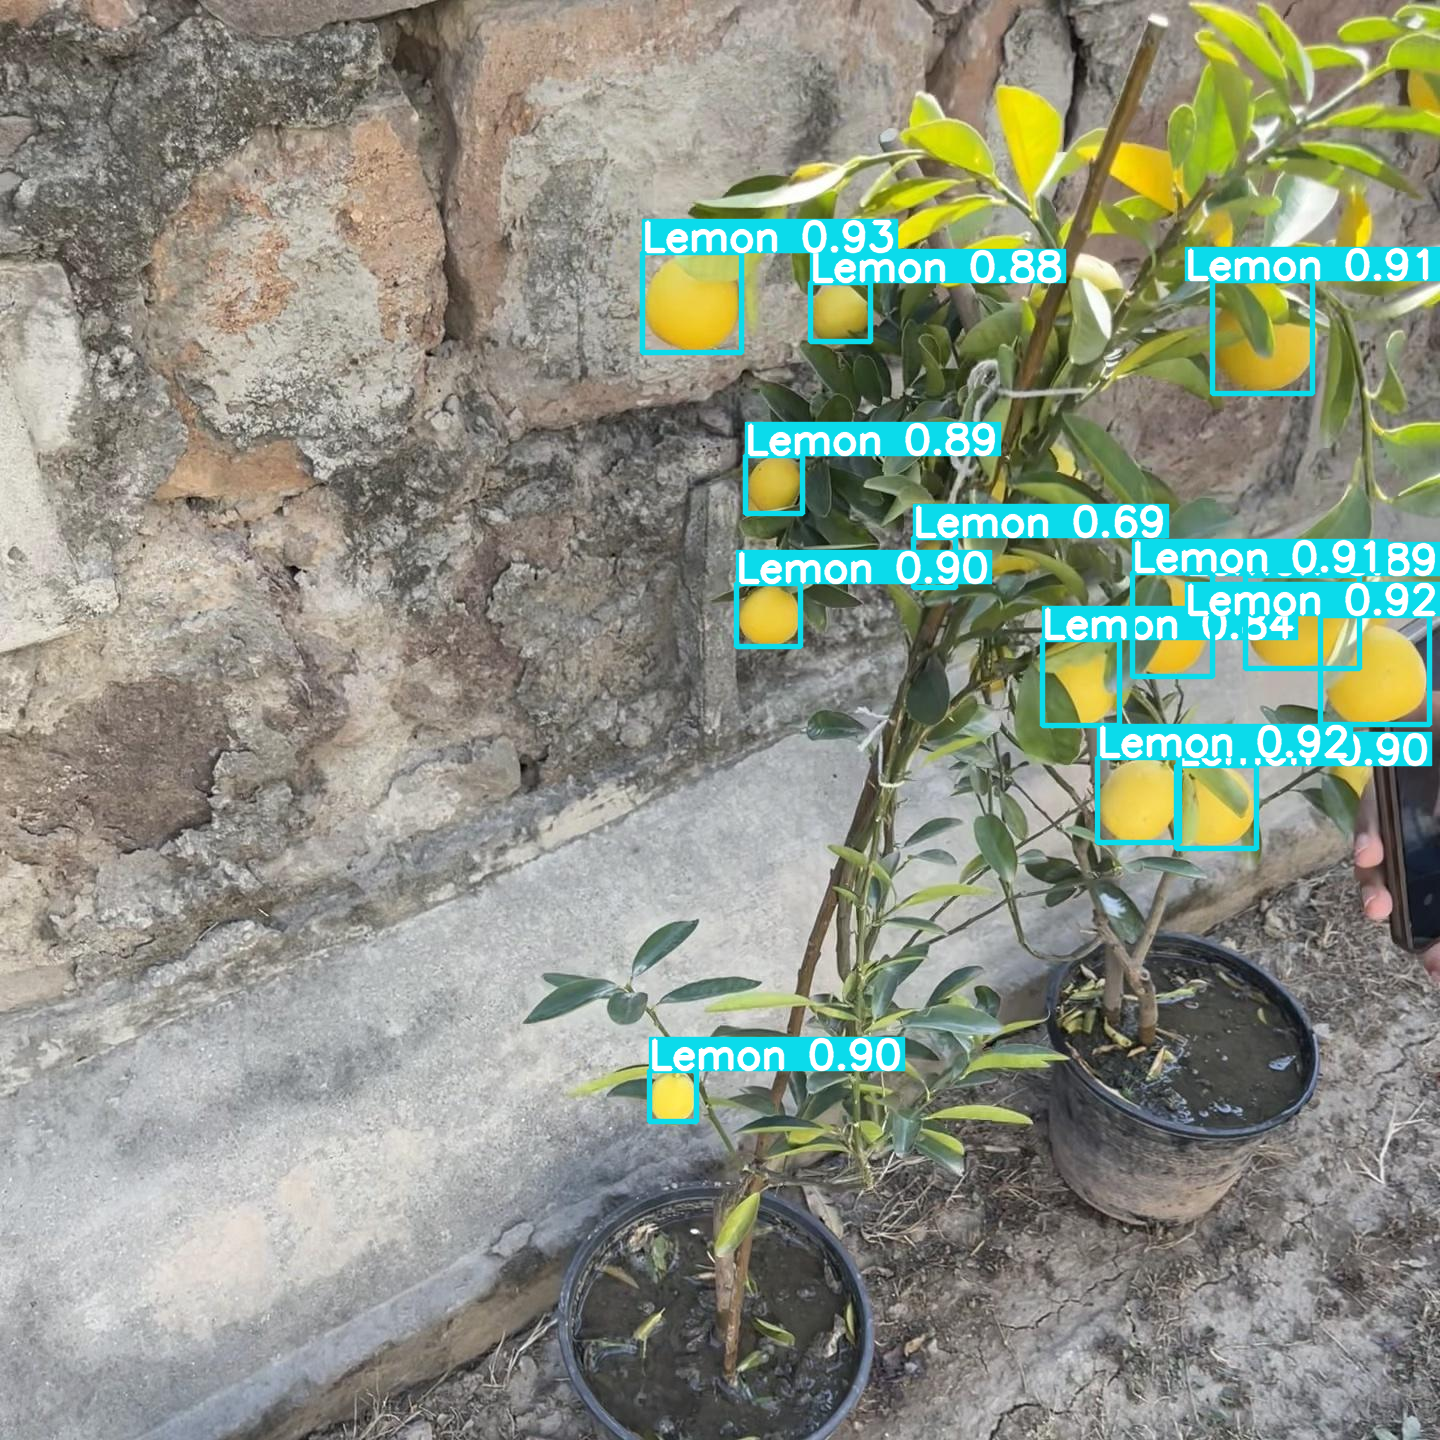

In [7]:
# 🚀 1. Charger les librairies
import torch
from matplotlib import pyplot as plt
import cv2

# 🚀 2. Charger ton modèle entraîné
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/Untitled_Folder/yolov5/runs/train/oranges_detect7/weights/best.pt', source='github')

# 🚀 3. Charger une image de test
img_path = '/content/drive/MyDrive/Untitled_Folder/valid/images/frame_0030_jpg.rf.b0cca3ea0992a0e4194235ade637f55b.jpg'  # 🖼️ Remplace ici par le chemin vers ton image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 🚀 4. Faire la prédiction
results = model(img)

# 🚀 5. Afficher les résultats
results.print()  # Affiche les infos sur les détections
results.show()   # Affiche l'image avec les bounding boxes

# (optionnel) Si tu veux sauvegarder l'image détectée :
# results.save(save_dir='/content/drive/MyDrive/Untitled_Folder/yolov5/runs/detect/exp')


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-4-27 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


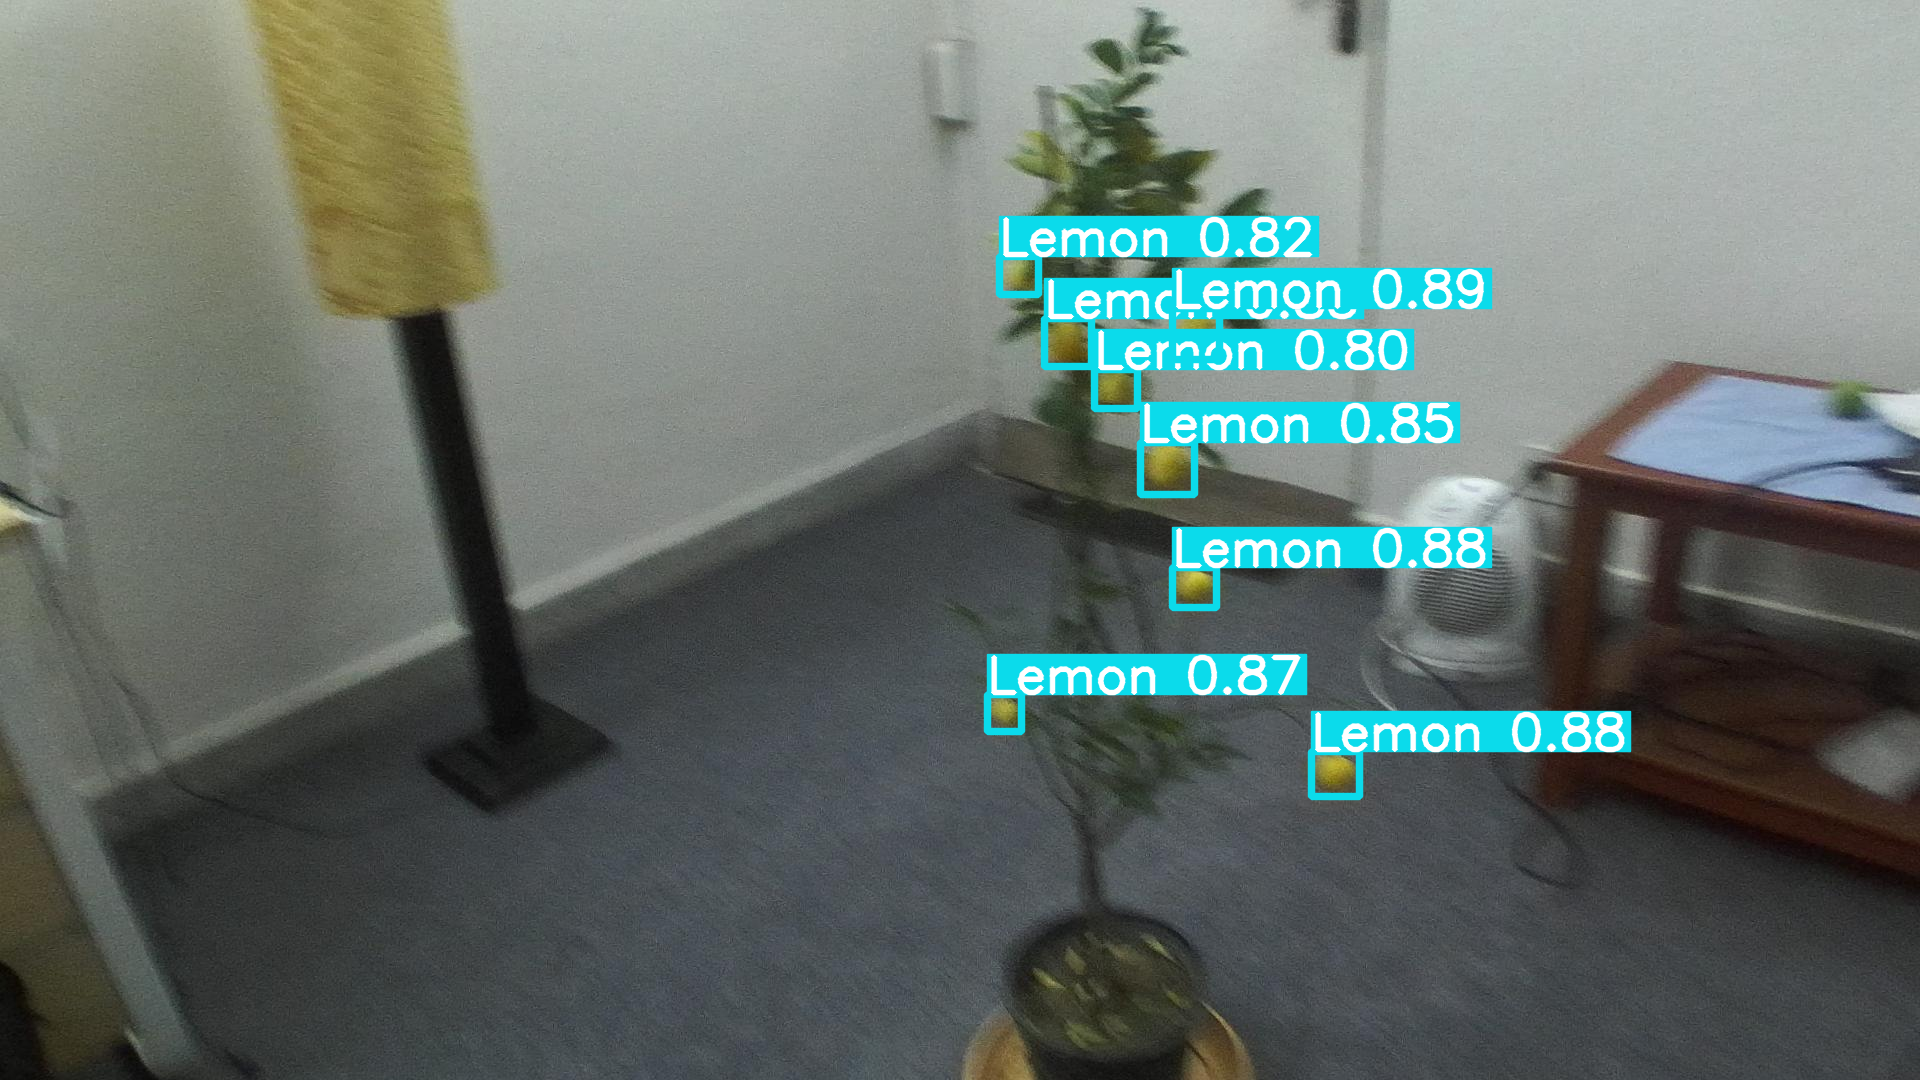

Nombre d'objets détectés :
name
Lemon    8
Name: count, dtype: int64


In [8]:
# 🚀 1. Importer les librairies
import torch
from matplotlib import pyplot as plt
from PIL import Image

# 🚀 2. Charger ton modèle entraîné
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/Untitled_Folder/yolov5/runs/train/oranges_detect7/weights/best.pt', source='github')

# 🚀 3. Charger ton image de test
img_path = '/content/drive/MyDrive/Untitled_Folder/valid/images/frame_00093_png.rf.157d6a4134f5d3f5125a5bec344031cb.jpg'
img = Image.open(img_path)

# 🚀 4. Faire la prédiction
results = model(img_path)

# 🚀 5. Afficher les résultats
results.show()

# 🚀 6. Compter combien d'objets ont été détectés
labels = results.pandas().xyxy[0]['name']  # Liste des classes détectées

# Afficher combien pour chaque type
count_per_class = labels.value_counts()
print("Nombre d'objets détectés :")
print(count_per_class)
